<a href="https://colab.research.google.com/github/Zzzain24/Stock-Price-Prediction/blob/main/stock_close_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from pandas_datareader import data as pdr
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()
plt.style.use("fivethirtyeight")

In [ ]:
#Get stock quote
df = pdr.get_data_yahoo("TSLA", start="2015-01-01", end="2023-06-27")
#Show data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
2023-06-21,275.130005,276.989990,257.779999,259.459991,259.459991,211797100
2023-06-22,250.770004,265.000000,248.250000,264.609985,264.609985,166875900


In [ ]:
#Get number of rows and columns in data set
df.shape

(2134, 6)

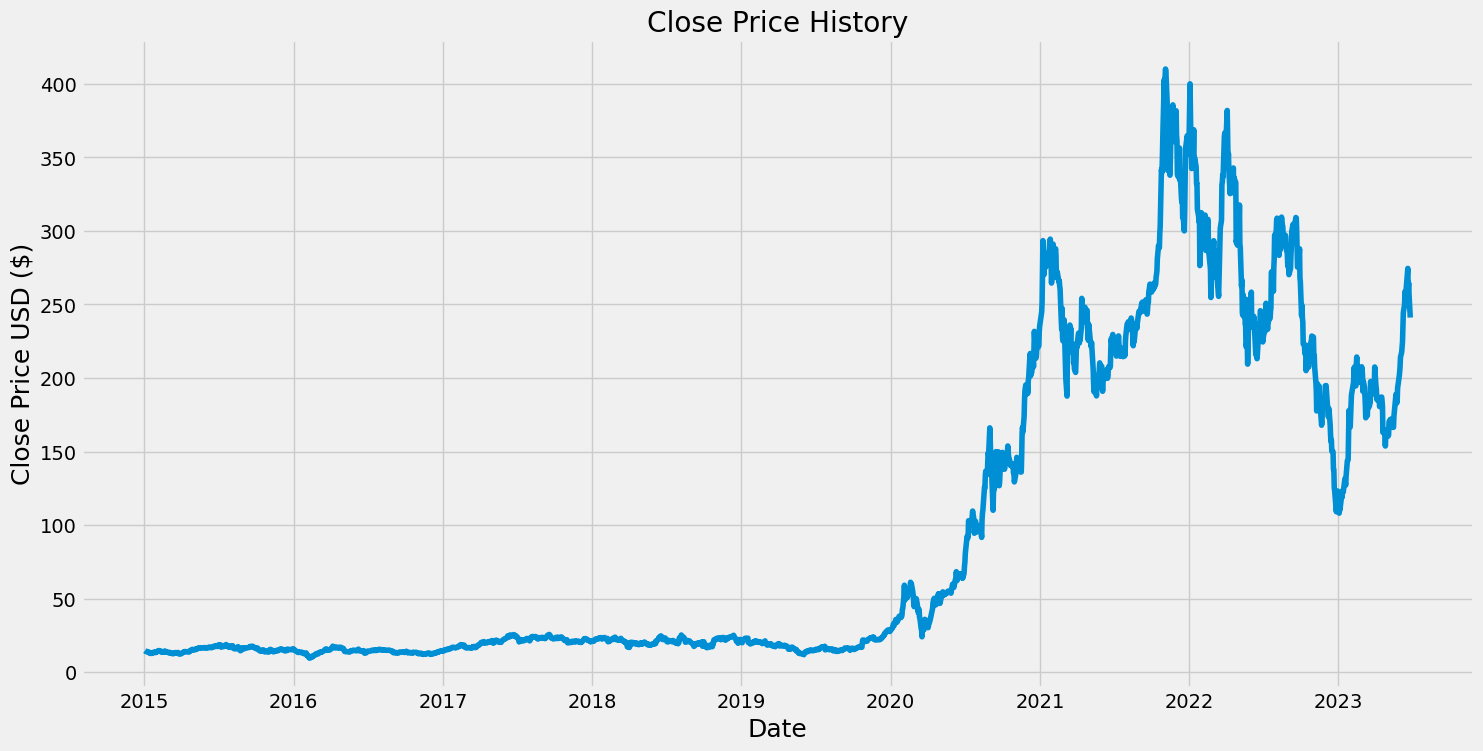

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the close column
data = df.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1708

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01259433],
       [0.01105916],
       [0.0112573 ],
       ...,
       [0.63695574],
       [0.6169504 ],
       [0.57811345]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
     print(x_train)
     print(y_train)
     print()


[array([0.01259433, 0.01105916, 0.0112573 , 0.01120235, 0.01114741,
       0.01048805, 0.00974712, 0.01008678, 0.008162  , 0.00802547,
       0.00822527, 0.00803546, 0.00880803, 0.00964888, 0.00959393,
       0.01046974, 0.01037483, 0.00927424, 0.01024496, 0.00997855,
       0.01120069, 0.01243614, 0.01246778, 0.01287405, 0.01226964,
       0.01228962, 0.01209148, 0.01151039, 0.00985867, 0.01000686,
       0.01010343, 0.01012175, 0.0113289 , 0.01222802, 0.01060128,
       0.01006347, 0.01000519, 0.0105763 , 0.00993526, 0.00893458,
       0.00930588, 0.00978541, 0.00948404, 0.00836014, 0.00786063,
       0.00776739, 0.00833683, 0.00789227, 0.00749432, 0.00866318,
       0.00850167, 0.00949736, 0.00865485, 0.00905945, 0.00931754,
       0.00966553, 0.00843007, 0.00778237, 0.00688159, 0.00780901])]
[0.007509308698712719]



In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1648, 60, 1)

In [ ]:
#Buld the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile model
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1648/1648 [==============================] - 61s 32ms/step - loss: 0.0013


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , : ]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])




In [ ]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predcitions = model.predict(x_test)
predictions = scaler.inverse_transform(predcitions)

14/14 [==============================] - 1s 19ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions - y_test) **2 )))
rmse

24.199618988543122

<ipython-input-19-7dd94961b92f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


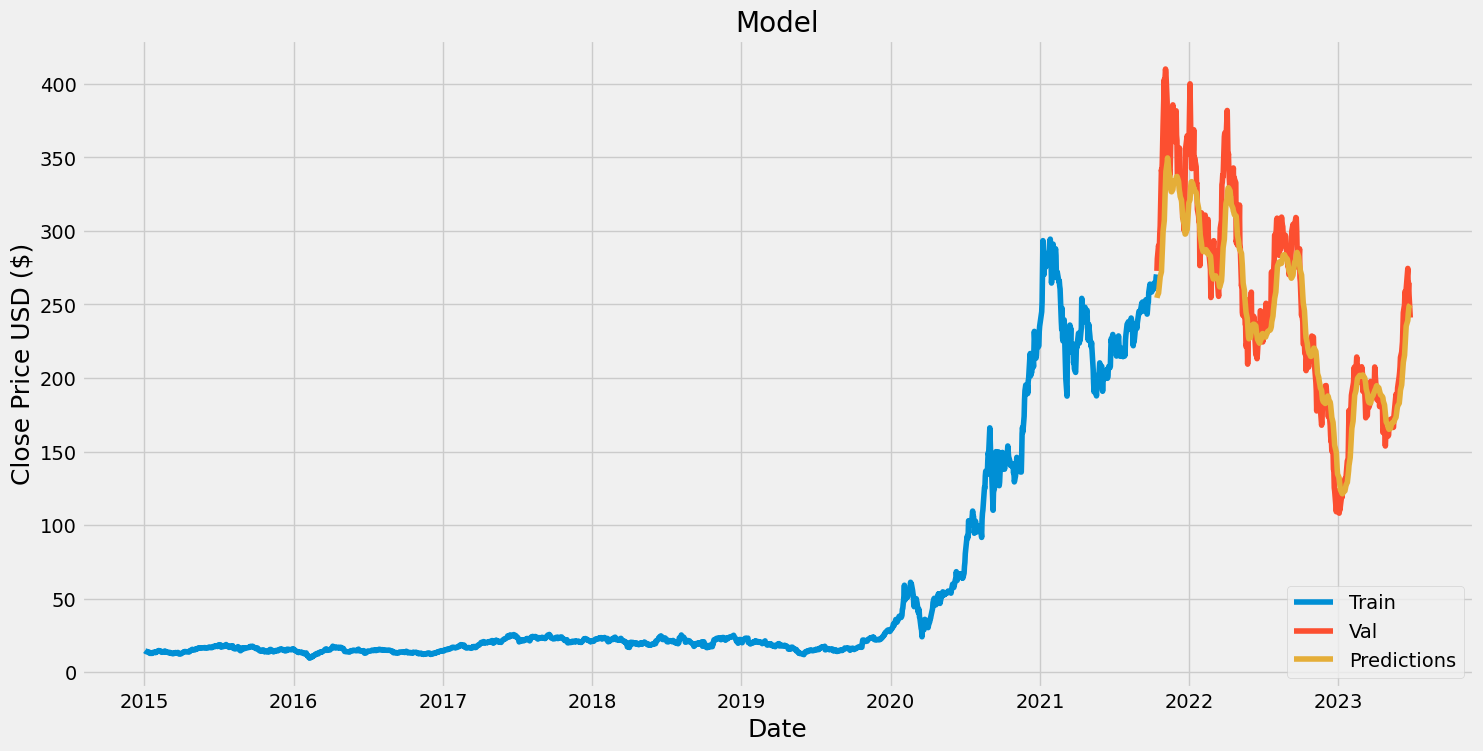

In [ ]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualize data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-14,272.773346,254.420670
2021-10-15,281.010010,255.741013
2021-10-18,290.036682,257.707550
2021-10-19,288.089996,260.532776
2021-10-20,288.600006,263.342316
...,...,...
2023-06-20,274.450012,239.108215
2023-06-21,259.459991,243.419952
2023-06-22,264.609985,246.320389


In [ ]:
#Get quote
apple_quote = pdr.get_data_yahoo("TSLA", start="2012-01-01", end="2023-06-23")
#Create a new dataframe
new_df = apple_quote.filter(["Close"])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create and empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
[[248.67682]]


In [ ]:
#Get quote
apple_quote2 = pdr.get_data_yahoo("TSLA", start="2023-06-23", end="2023-06-24")
print(apple_quote2["Close"])

[*********************100%%**********************]  1 of 1 completed
Date
2023-06-23    256.600006
Name: Close, dtype: float64
